In [1]:
! pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [3]:
test_df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/test.txt', sep=';', header=None, names=['Text', 'Emotion'])
train_df = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/train.txt', sep=';', header=None, names=['Text', 'Emotion'])

In [4]:
train_df.tail()

,Text,Emotion
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


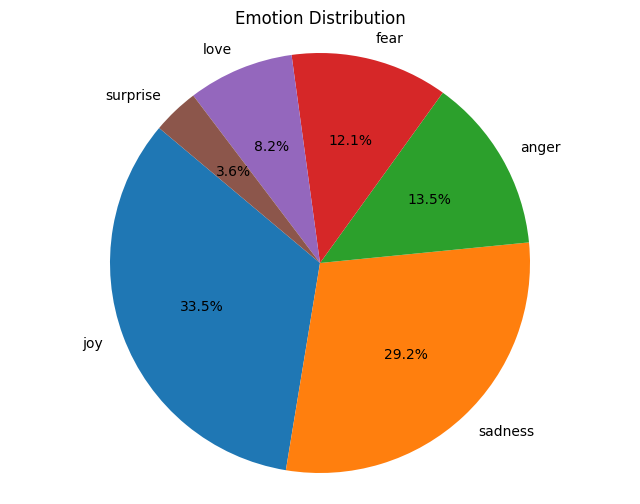

In [5]:
emotion_counts = train_df['Emotion'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [6]:
# Remove the user handles
train_df['Text'] = train_df['Text'].apply(nfx.remove_userhandles)
# Remove the stopwords
train_df['Text'] = train_df['Text'].apply(nfx.remove_stopwords)
# Remove the user handles
test_df['Text'] = test_df['Text'].apply(nfx.remove_userhandles)
# Remove the stopwords
test_df['Text'] = test_df['Text'].apply(nfx.remove_stopwords)

In [7]:
x = train_df['Text']
y = train_df['Emotion']

In [8]:
rf_classifier = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
rf_classifier.fit(x, y)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [9]:
rf_predictions = rf_classifier.predict(test_df['Text'])
rf_accuracy = accuracy_score(test_df['Emotion'], rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.887


Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.89      0.90       275
        fear       0.87      0.87      0.87       224
         joy       0.89      0.93      0.91       695
        love       0.78      0.71      0.74       159
     sadness       0.94      0.92      0.93       581
    surprise       0.68      0.59      0.63        66

    accuracy                           0.89      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



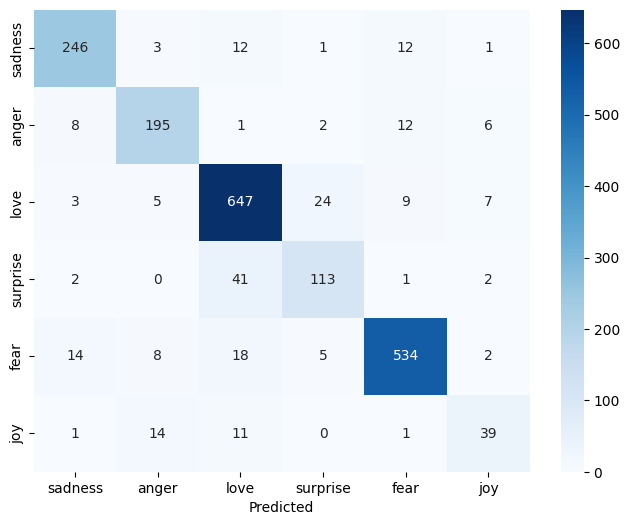

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_df['Emotion'], rf_predictions)

# Classification Report
classification_rep = classification_report(test_df['Emotion'], rf_predictions)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['Emotion'].unique() ,yticklabels=train_df['Emotion'].unique())
plt.xlabel('Predicted')

# Displaying Classification Report
print("Classification Report:")
print(classification_rep)

In [11]:
def predict_emotion(text, model):
    # Preprocess the text
    processed_text = nfx.remove_userhandles(text)
    processed_text = nfx.remove_stopwords(processed_text)
    
    # Make prediction
    prediction = rf_classifier.predict([processed_text])
    
    # Return the predicted emotion
    return prediction[0]

In [12]:
# Example usage:
text = "I heard footsteps behind me as I walked home alone at night"
predicted_emotion = predict_emotion(text, rf_classifier)
print("Predicted emotion:", predicted_emotion)

Predicted emotion: fear


In [13]:
# Example usage:
text = "I cried when I remembered the past. It made me feel very sad"
predicted_emotion = predict_emotion(text, rf_classifier)
print("Predicted emotion:", predicted_emotion)

Predicted emotion: sadness


In [14]:
# Example usage:
text = "I got really mad when my brother broke my ps4."
predicted_emotion = predict_emotion(text, rf_classifier)
print("Predicted emotion:", predicted_emotion)

Predicted emotion: anger
